<a href="https://colab.research.google.com/github/zwt4pb/EDA/blob/main/2EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Q1
df = pd.read_csv('/content/college_completion.csv',low_memory=False)

In [ ]:
#Q2
print(df.shape, '\n')
print(df.head(), '\n')

(3798, 63) 

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ..

There are 3798 observations, with 63 variables.

In [ ]:
#Q3
print(pd.crosstab(df['control'], df['level']), '\n')
print(pd.crosstab(df['control'], df['level'], normalize= 'all'), '\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 

The largest percentage of institutions are private not-for-profit 4 year programs, at 31%. After that, 24% of colleges are public 2-year programs, and then public 4 year programs make up 17%. Lastly, Private for-profit colleges are about the same whether 2 year or 4 year around 12-13%, and barely any of the schools are private not-for-profit 2 year programs.


The largest percentage of institutions are private not-for-profit 4 year programs, at 31%. After that, 24% of colleges are public 2-year programs, and then public 4 year programs make up 17%. Lastly, Private for-profit colleges are about the same whether 2 year or 4 year around 12-13%, and barely any of the schools are private not-for-profit 2 year programs.

histogram:


<Axes: xlabel='grad_100_value', ylabel='Count'>

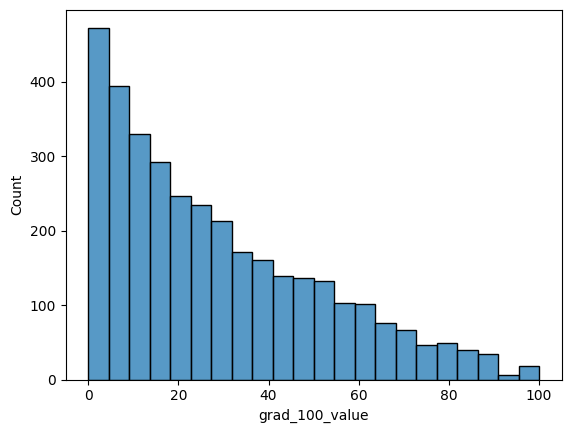

In [ ]:
#Q4
import seaborn as sns
print("histogram:")
sns.histplot(df['grad_100_value'])

kernel density plot:


<Axes: xlabel='grad_100_value', ylabel='Density'>

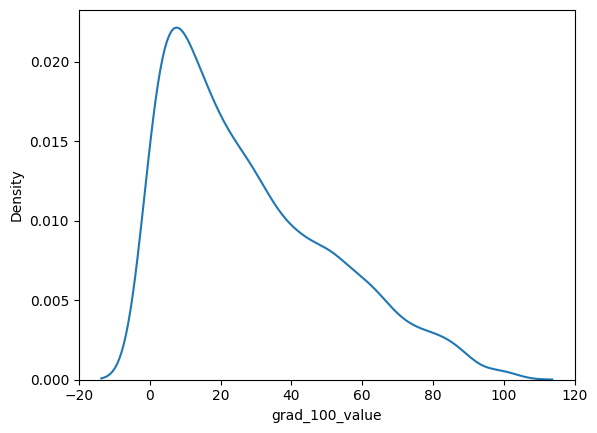

In [ ]:
print("kernel density plot:")
sns.kdeplot(df['grad_100_value'])

boxplot:


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='grad_100_value'>

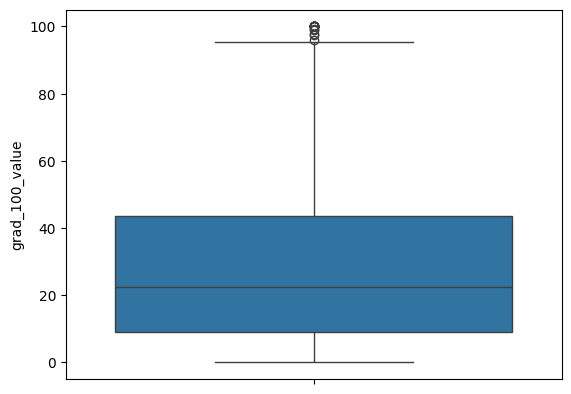

In [ ]:
print("boxplot:")
sns.boxplot(df['grad_100_value'])

In [ ]:
print("statistical description:")
df['grad_100_value'].describe()

statistical description:


,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

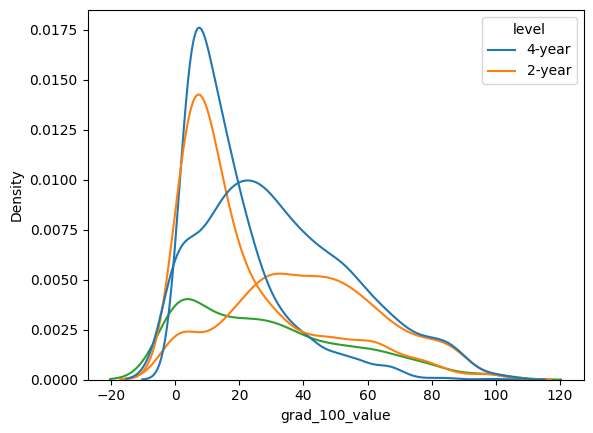

In [ ]:
#Q5
sns.kdeplot(data=df,x='grad_100_value',hue='control')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

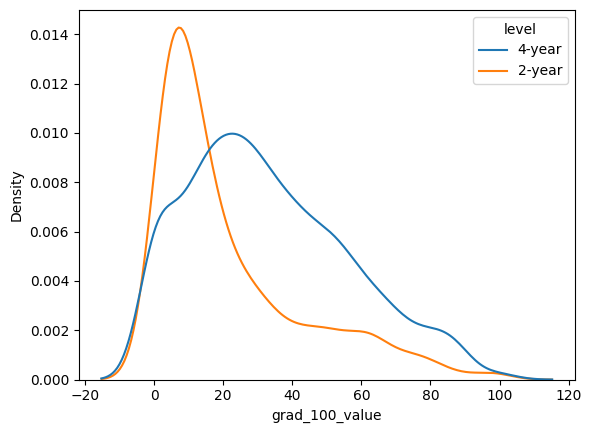

In [ ]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [ ]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [ ]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

4-year average graduation rates are about 12 points higher than 2-year graduation rates. Private not-for-profit rates are about 42%, whereas private for-profit rates are 29% and 17% rates for public.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

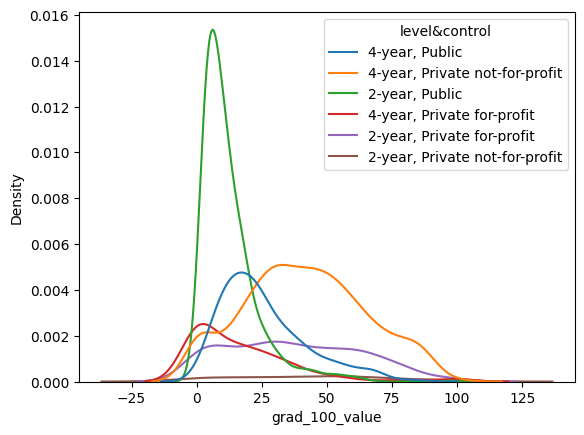

In [ ]:
#Q6
df['level&control'] = df['level'] +', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='level&control')

In [ ]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

Private for-profit 2-year schools have nearly double the graduation rates of private for-profit 4-year schools. Private not-for-profit institutions show little difference between 2-year and 4-year programs, while public 2-year schools have the lowest rates. Overall, private for-profit 2-year programs perform better than expected based on graduation rates.

<Axes: xlabel='aid_arcsinh', ylabel='Density'>

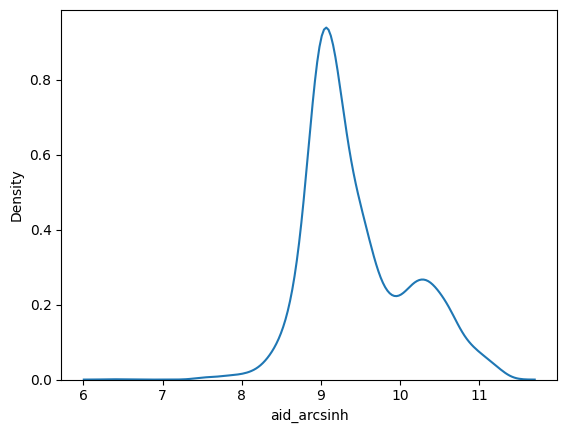

In [ ]:
#Q7
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
sns.kdeplot(data=df,x='aid_arcsinh')

<Axes: xlabel='aid_value', ylabel='Density'>

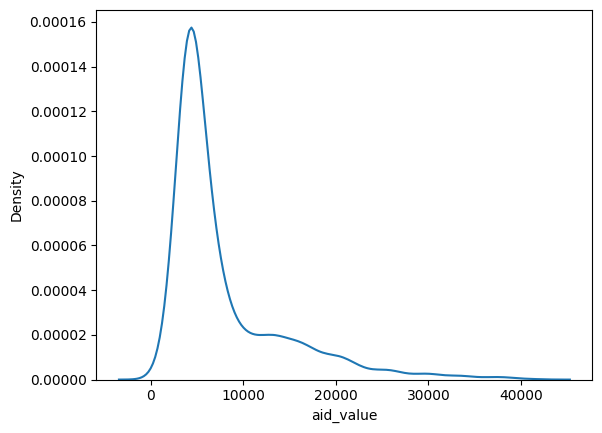

In [ ]:
sns.kdeplot(data=df,x='aid_value')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

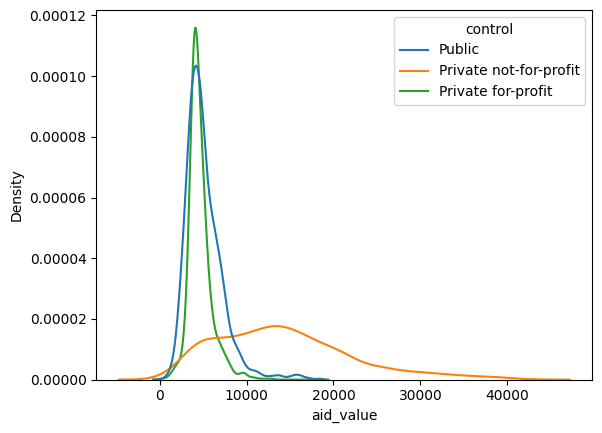

In [ ]:
sns.kdeplot(data=df,x='aid_value',hue='control')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

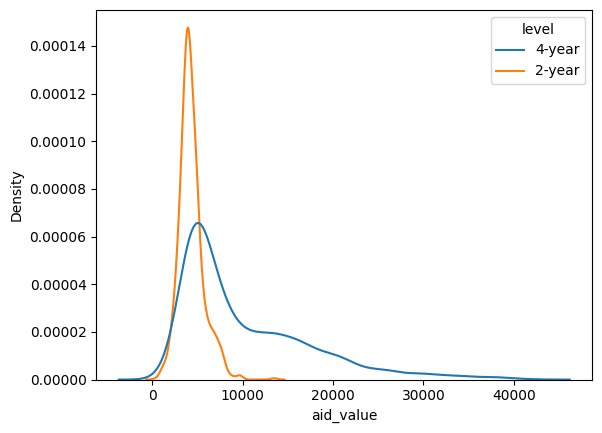

In [ ]:
sns.kdeplot(data=df,x='aid_value',hue='level')

In [ ]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [ ]:
df.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

The second mode represents private not-for-profit institutions, while the peak around 9 indicates public and private for-profit institutions. Private not-for-profit schools offer significantly more financial aid, while public and private for-profit schools provide similar amounts. This difference isn't due to the level of institution, as private not-for-profit includes both types.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

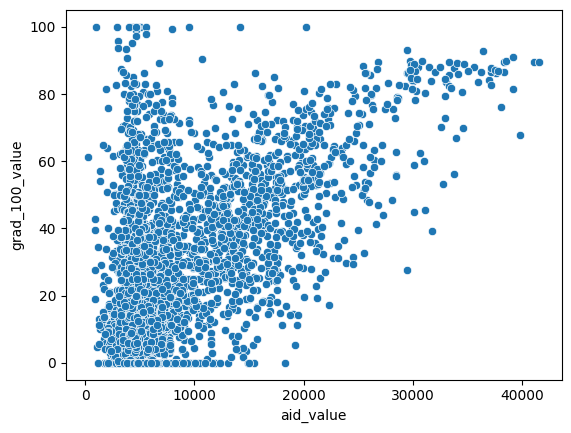

In [ ]:
#Q8
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')


One group of points shows a positive relationship between grad_100_value and aid_value, while another group has increasing grad_100_value but relatively stable aid_value.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

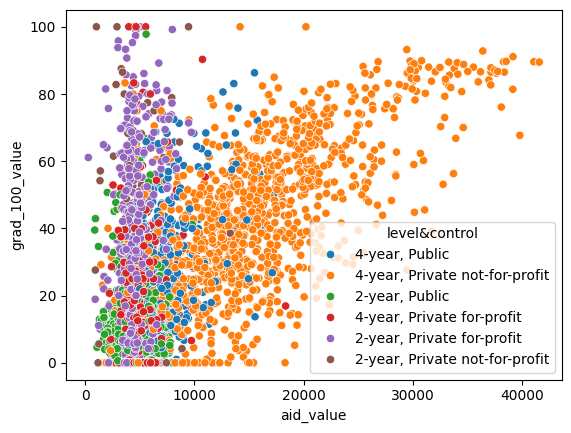

In [ ]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level&control')

The positive association mainly comes from 4-year private not-for-profit institutions, where aid_value and grad_100_value both increase together. Other groups provide less aid, and their graduation rates vary widely. This could be due to recruiting, with private not-for-profits attracting talented students by offering more aid. Alternatively, it could suggest that more aid leads to higher graduation rates. While the data can't confirm either explanation, the trends are worth considering.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

2.
The data dictionary provides information on how missing values are addressed. For categorical variables, it lists the potential values, and while I could not immediately find specific codes for missing values, I believe they should be included in a dataset of this nature. The dictionary also explains how missing values are treated for numeric variables. Overall, I think the data dictionary covers the essential elements needed to comprehend the dataset effectively. It exhibits a good level of clarity and consistency, which aids in my understanding and analysis of the data.

3. I'd like to pick out the variables dem_income, dem_age, and dem_race. Income serves as a crucial indicator of a beneficiary’s ability to access additional healthcare resources, afford supplemental insurance, and maintain overall financial stability. In the Medicare population, disparities in income can lead to variations in healthcare outcomes, service utilization, and access to high-quality care. Given that Medicare primarily caters to individuals aged 65 and older, understanding age is essential for grasping the differences in healthcare needs. For instance, older beneficiaries may have a greater need for long-term care services or may experience more severe chronic conditions. Furthermore, age can affect eligibility for specific Medicare plans and services.

In [41]:
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('/content/sfpuf2021_1_fall.csv')

<ipython-input-42-f7c5e3ab10f6>:1: DtypeWarning: Columns (43,46,49,50,51,52,53,73,76,77,81,82,83,85,90,92,99,100,105,106,107,112,113,118,119,123,124,125,126,128,129,135,136,137,138,139,140,142,143,151,155,156,161,163,172,176,183,184,185,186,191,192,193,194,195,197,198,199,200,208,209,210,211,214,217,218,219,220,221,222,223,224,225,227,229) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sfpuf2021_1_fall.csv')


In [43]:
df.head()

,PUF_ID,SURVEYYR,VERSION,ADM_H_MEDSTA,ADM_H_GHPSW,ADM_H_PDRS,ADM_OP_MDCD,ADM_DUAL_FLAG_YR,ADM_FFS_FLAG_YR,ADM_MA_FLAG_YR,...,PUFF091,PUFF092,PUFF093,PUFF094,PUFF095,PUFF096,PUFF097,PUFF098,PUFF099,PUFF100
0,21000003,2021,1,1,2,1.0,1,1,3,1,...,988.252590,5273.441518,1095.075758,1245.906455,6049.581125,994.556718,5490.385215,1264.822658,5632.555206,989.464837
1,21000004,2021,1,1,2,1.0,1,1,3,1,...,22599.768459,3574.297077,2905.632202,3011.695926,4283.873099,18154.868227,16722.373362,15553.879545,14193.033902,18737.870831
2,21000005,2021,1,1,2,1.0,1,1,3,1,...,3998.371708,3748.552103,574.146156,4082.909199,559.108837,571.423027,3550.951071,4554.459435,605.491265,612.180490
3,21000011,2021,1,1,2,1.0,1,1,3,1,...,5679.361042,982.382754,1046.200903,1103.813758,1085.475033,1231.049575,1157.845607,720.394183,1134.894480,778.578574
4,21000012,2021,1,1,1,1.0,2,3,1,3,...,12188.282713,14418.230488,10457.419141,2761.012141,2160.504248,2346.820214,2230.871858,17188.553558,12597.595445,13900.497117


In [45]:
df.columns = df.columns.str.strip()

print("Column names:", df.columns)
print(df.head())

missing_values = df[['DEM_INCOME', 'DEM_AGE', 'DEM_RACE']].isnull().sum()
print("Missing values:\n", missing_values)

df_cleaned = df.dropna(subset=['DEM_INCOME', 'DEM_AGE', 'DEM_RACE'])

df_cleaned['DEM_RACE'] = df_cleaned['DEM_RACE'].astype('category')
print("Data types after cleaning:\n", df_cleaned.dtypes)

Column names: Index(['PUF_ID', 'SURVEYYR', 'VERSION', 'ADM_H_MEDSTA', 'ADM_H_GHPSW',
       'ADM_H_PDRS', 'ADM_OP_MDCD', 'ADM_DUAL_FLAG_YR', 'ADM_FFS_FLAG_YR',
       'ADM_MA_FLAG_YR',
       ...
       'PUFF091', 'PUFF092', 'PUFF093', 'PUFF094', 'PUFF095', 'PUFF096',
       'PUFF097', 'PUFF098', 'PUFF099', 'PUFF100'],
      dtype='object', length=337)
     PUF_ID  SURVEYYR  VERSION  ADM_H_MEDSTA  ADM_H_GHPSW  ADM_H_PDRS  \
0  21000003      2021        1             1            2         1.0   
1  21000004      2021        1             1            2         1.0   
2  21000005      2021        1             1            2         1.0   
3  21000011      2021        1             1            2         1.0   
4  21000012      2021        1             1            1         1.0   

   ADM_OP_MDCD  ADM_DUAL_FLAG_YR  ADM_FFS_FLAG_YR  ADM_MA_FLAG_YR  ...  \
0            1                 1                3               1  ...   
1            1                 1                3         

Part 4

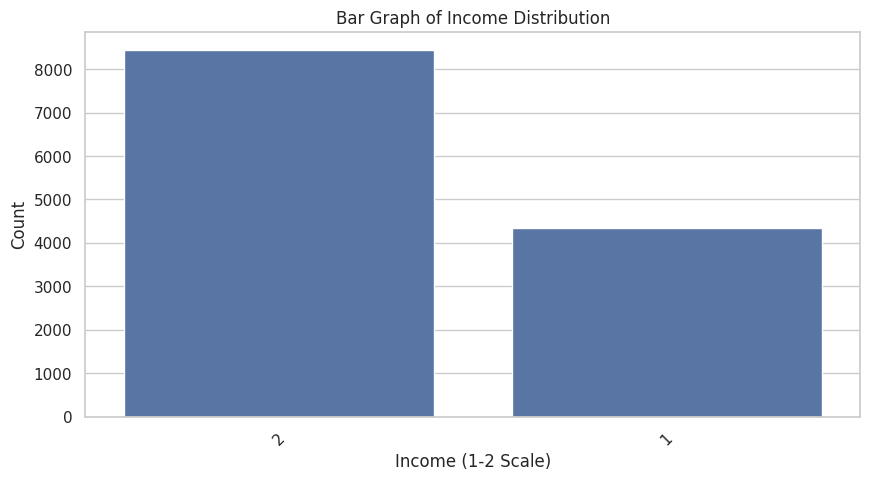

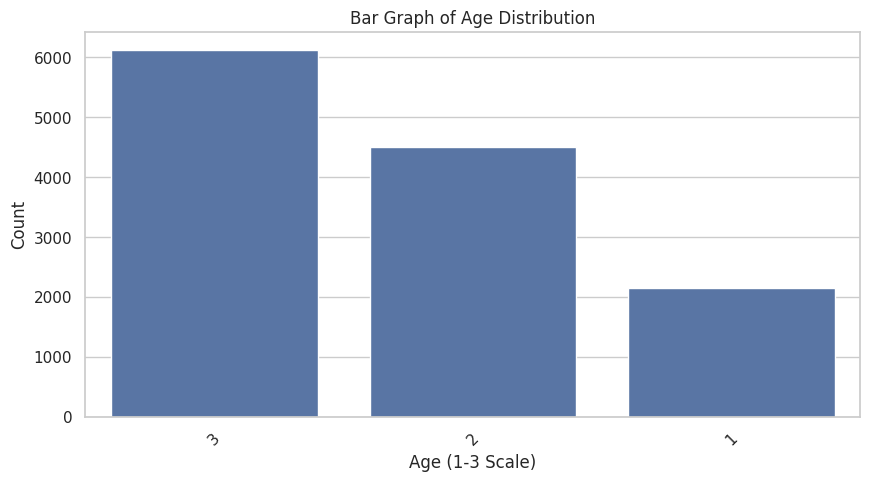

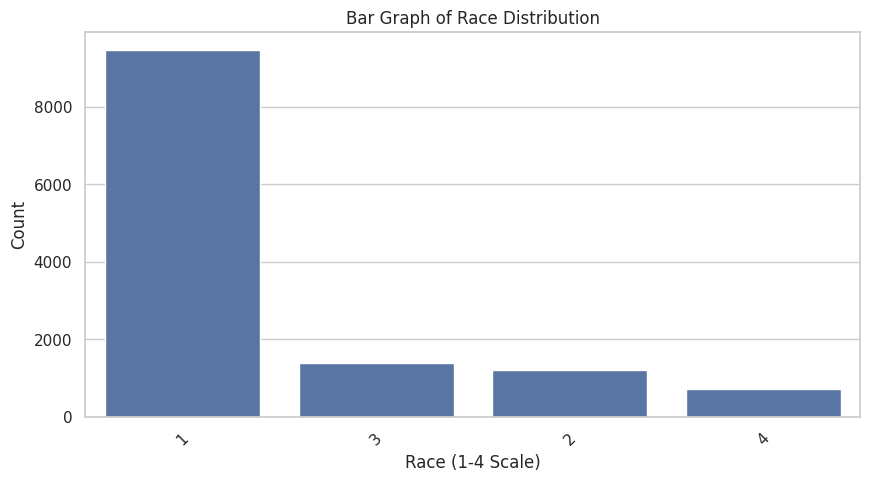

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# DEM_INCOME graph
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='DEM_INCOME', order=df_cleaned['DEM_INCOME'].value_counts().index)
plt.title('Bar Graph of Income Distribution')
plt.xlabel('Income (1-2 Scale)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# DEM_AGE graph
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='DEM_AGE', order=df_cleaned['DEM_AGE'].value_counts().index)
plt.title('Bar Graph of Age Distribution')
plt.xlabel('Age (1-3 Scale)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# DEM_RACE graph
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='DEM_RACE', order=df_cleaned['DEM_RACE'].value_counts().index)
plt.title('Bar Graph of Race Distribution')
plt.xlabel('Race (1-4 Scale)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

I don't see any specific outliers in the data.

Part 5

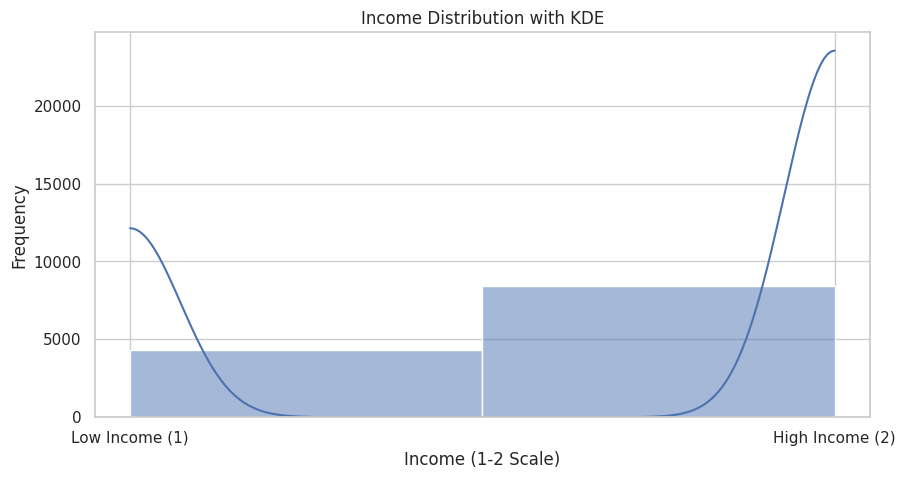

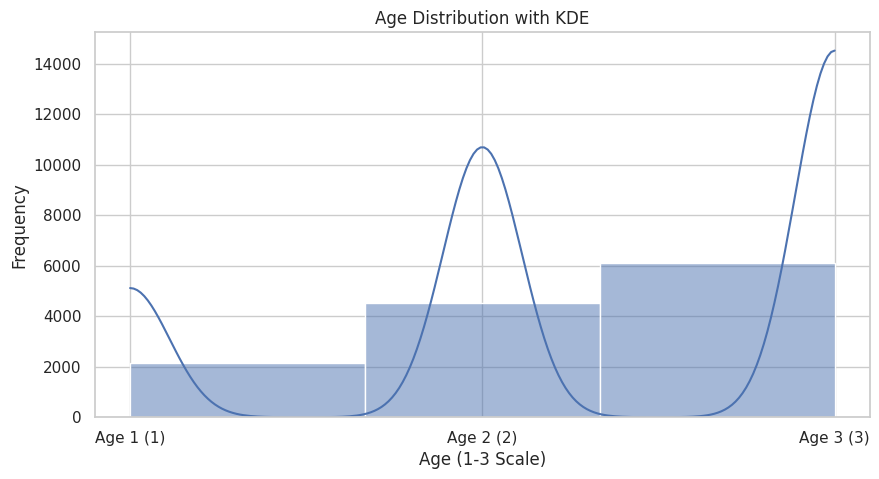

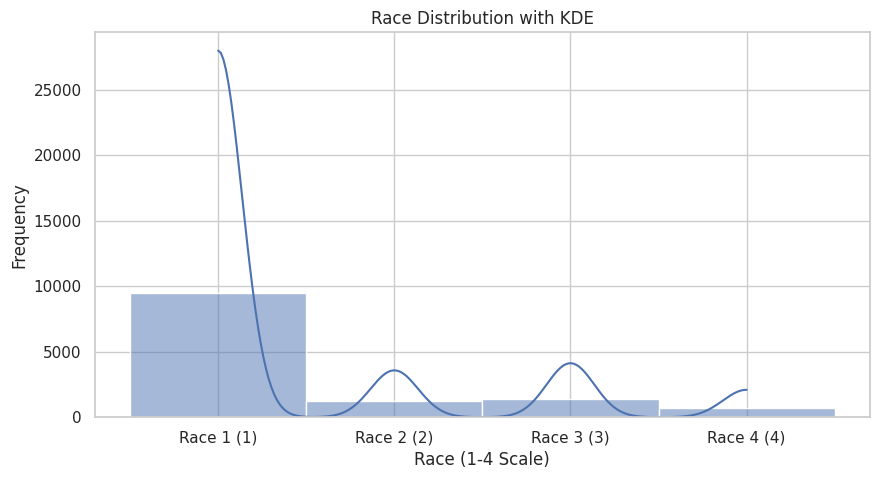

In [51]:
sns.set(style="whitegrid")

# Create a histogram for DEM_INCOME
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['DEM_INCOME'], bins=2, kde=True)
plt.title('Income Distribution with KDE')
plt.xlabel('Income (1-2 Scale)')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2], labels=['Low Income (1)', 'High Income (2)'])
plt.show()

# Create a histogram for DEM_AGE
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['DEM_AGE'], bins=3, kde=True)
plt.title('Age Distribution with KDE')
plt.xlabel('Age (1-3 Scale)')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2, 3], labels=['Age 1 (1)', 'Age 2 (2)', 'Age 3 (3)'])
plt.show()

# Create a histogram for DEM_RACE
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['DEM_RACE'], bins=4, kde=True)
plt.title('Race Distribution with KDE')
plt.xlabel('Race (1-4 Scale)')
plt.ylabel('Frequency')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Race 1 (1)', 'Race 2 (2)', 'Race 3 (3)', 'Race 4 (4)'])
plt.show()

No numerical transformations are needed.

Part 6

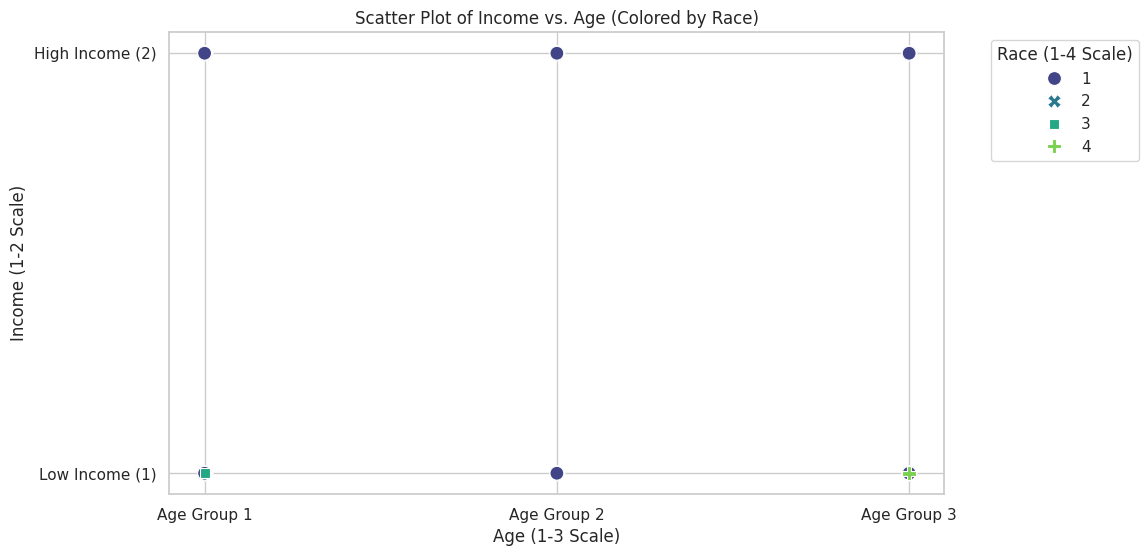

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='DEM_AGE', y='DEM_INCOME', hue='DEM_RACE', palette='viridis', style='DEM_RACE', s=100)
plt.title('Scatter Plot of Income vs. Age (Colored by Race)')
plt.xlabel('Age (1-3 Scale)')
plt.ylabel('Income (1-2 Scale)')
plt.xticks(ticks=[1, 2, 3], labels=['Age Group 1', 'Age Group 2', 'Age Group 3'])
plt.yticks(ticks=[1, 2], labels=['Low Income (1)', 'High Income (2)'])
plt.legend(title='Race (1-4 Scale)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In all honesty, I am not very sure how to read this one. It looks to me like there is no relationship.

Part 7

In [55]:
# Cross-tabulation of DEM_RACE and DEM_INCOME
cross_tab_income_race = pd.crosstab(df_cleaned['DEM_RACE'], df_cleaned['DEM_INCOME'], margins=True)
print(cross_tab_income_race)
print('\n')

# Cross-tabulation of DEM_RACE and DEM_AGE
cross_tab_age_race = pd.crosstab(df_cleaned['DEM_RACE'], df_cleaned['DEM_AGE'], margins=True)
print(cross_tab_age_race)
print('\n')

# Descriptive summary of original categorical variables
descriptive_summary = df_cleaned[['DEM_INCOME', 'DEM_AGE', 'DEM_RACE']].describe(include='all')
print(descriptive_summary)

DEM_INCOME     1     2    All
DEM_RACE                     
1           2444  7023   9467
2            734   477   1211
3            861   535   1396
4            309   400    709
All         4348  8435  12783


DEM_AGE      1     2     3    All
DEM_RACE                         
1         1323  3351  4793   9467
2          409   395   407   1211
3          270   507   619   1396
4          154   255   300    709
All       2156  4508  6119  12783


          DEM_INCOME       DEM_AGE  DEM_RACE
count   12783.000000  12783.000000   12783.0
unique           NaN           NaN       4.0
top              NaN           NaN       1.0
freq             NaN           NaN    9467.0
mean        1.659861      2.310021       NaN
std         0.473774      0.742478       NaN
min         1.000000      1.000000       NaN
25%         1.000000      2.000000       NaN
50%         2.000000      2.000000       NaN
75%         2.000000      3.000000       NaN
max         2.000000      3.000000       NaN


The tables display the counts of respondents for each combination of race and income level, as well as for all other previously mentioned combinations. The margins indicate total counts, allowing for an overview of the overall frequency.